In [58]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [59]:
#from google.colab import drive
#drive.mount('/content/drive')

Preprocessing of the dataset

In [60]:
#Loading the part of the dataset where we were in front of the cam

Label1 = pd.read_csv("Dataset_With_Person.csv")
Label1 = pd.DataFrame(Label1)
Label1 = Label1.drop(columns='Info')
Label1 = Label1.drop(columns='Data length')
Label1 = Label1.drop(columns=['No.'])

#Label1['Time'] = pd.to_datetime(Label1['Time'], unit='s')

Label1 = Label1[Label1['Protocol'] == "UDP"]
Label1 = Label1.rename(columns= {'Time since previous frame' : 'Time since previous frame mean', 'Length' : 'Data length mean'})

Label1

,Time,Time since previous frame mean,Source,Destination,Data length mean,Time to Live,Protocol
0,0.000000,0.000000,151.48.168.116,192.168.1.10,703.0,53.0,UDP
1,0.000353,0.000353,151.48.168.116,192.168.1.10,703.0,53.0,UDP
2,0.000754,0.000401,151.48.168.116,192.168.1.10,1132.0,53.0,UDP
3,0.001130,0.000376,151.48.168.116,192.168.1.10,1132.0,53.0,UDP
4,0.001132,0.000002,151.48.168.116,192.168.1.10,843.0,53.0,UDP
...,...,...,...,...,...,...,...
299151,419.986083,0.002761,151.48.168.116,192.168.1.10,100.0,53.0,UDP
299152,419.998455,0.012372,151.48.168.116,192.168.1.10,872.0,53.0,UDP
299153,419.998458,0.000003,151.48.168.116,192.168.1.10,872.0,53.0,UDP
299154,419.998459,0.000001,151.48.168.116,192.168.1.10,872.0,53.0,UDP


In [61]:
#Loading the part of the dataset where there is only background on the cam

Label0 = pd.read_csv("Dataset_With_Background.csv")
Label0 = pd.DataFrame(Label0)
Label0 = Label0.drop(columns='Info')
Label0 = Label0.drop(columns='Data length')
Label0 = Label0.drop(columns=['No.'])

#adding 300 seconds in order to correctly group the time windows
Label0['Time'] = Label0['Time'] + 421

#Label0['Time'] = pd.to_datetime(Label0['Time'], unit='s')
Label0 = Label0[Label0['Protocol'] == "UDP"]

Label0 = Label0.rename(columns= {'Time since previous frame' : 'Time since previous frame mean', 'Length' : 'Data length mean'})

Label0


,Time,Time since previous frame mean,Source,Destination,Data length mean,Time to Live,Protocol
0,421.000000,0.000000,192.168.1.10,151.48.168.116,124.0,64.0,UDP
1,421.006310,0.006310,192.168.1.10,151.48.168.116,973.0,64.0,UDP
2,421.011550,0.005240,151.48.168.116,192.168.1.10,96.0,53.0,UDP
3,421.013105,0.001555,151.48.168.116,192.168.1.10,1104.0,53.0,UDP
4,421.013107,0.000002,151.48.168.116,192.168.1.10,905.0,53.0,UDP
...,...,...,...,...,...,...,...
285739,840.960542,0.000000,192.168.1.10,151.48.168.116,979.0,64.0,UDP
285740,840.960543,0.000001,192.168.1.10,151.48.168.116,1138.0,64.0,UDP
285741,840.960543,0.000000,192.168.1.10,151.48.168.116,1138.0,64.0,UDP
285742,840.960543,0.000000,192.168.1.10,151.48.168.116,1138.0,64.0,UDP


In [62]:
#we create the final dataset with both the two parts (cam with person and with background)

df = Label1.append(Label0)
df = df.reset_index()
df

,index,Time,Time since previous frame mean,Source,Destination,Data length mean,Time to Live,Protocol
0,0,0.000000,0.000000,151.48.168.116,192.168.1.10,703.0,53.0,UDP
1,1,0.000353,0.000353,151.48.168.116,192.168.1.10,703.0,53.0,UDP
2,2,0.000754,0.000401,151.48.168.116,192.168.1.10,1132.0,53.0,UDP
3,3,0.001130,0.000376,151.48.168.116,192.168.1.10,1132.0,53.0,UDP
4,4,0.001132,0.000002,151.48.168.116,192.168.1.10,843.0,53.0,UDP
...,...,...,...,...,...,...,...,...
574705,285739,840.960542,0.000000,192.168.1.10,151.48.168.116,979.0,64.0,UDP
574706,285740,840.960543,0.000001,192.168.1.10,151.48.168.116,1138.0,64.0,UDP
574707,285741,840.960543,0.000000,192.168.1.10,151.48.168.116,1138.0,64.0,UDP
574708,285742,840.960543,0.000000,192.168.1.10,151.48.168.116,1138.0,64.0,UDP


In order to create a useful dataset to fit the models, we have to create samples by windowing the raw dataset with window of T seconds.
While aggregating every T seconds, we compute some useful features.

In [63]:
#filter the right ip and set the value for the time windows
dst_address = "151.48.168.116"
time_window = "0.5S"
x = df.at[df.index[-1], 'Time']
x

840.9605429999999

In [64]:
#Creating the batch of 0.5 seconds grouping by the values of each time windows

df['Data length std'] = df['Data length mean']
df['Data length median'] = df['Data length mean']
df['Time since previous frame std'] = df['Time since previous frame mean']
df['Time since previous frame median'] = df['Time since previous frame mean']

df_complete = df.groupby(pd.cut(df['Time'], np.arange(0, round(df.at[df.index[-1], 'Time']), 0.5))).agg(
    {'Time to Live' : np.mean, 'Time since previous frame mean' : np.mean, 'Time since previous frame std' : 'std', 'Time since previous frame median' : np.median,
     'Data length mean' : np.mean, 'Data length std' : 'std', 'Data length median': np.median})

'''
df_complete = df.resample(time_window, on='Time', kind='timestamp').agg(
    {'Time to Live' : np.mean, 'Time since previous frame mean' : np.mean, 'Time since previous frame std' : 'std', 'Time since previous frame median' : np.median,
     'Data length mean' : np.mean, 'Data length std' : 'std', 'Data length median': np.median})
'''

"\ndf_complete = df.resample(time_window, on='Time', kind='timestamp').agg(\n    {'Time to Live' : np.mean, 'Time since previous frame mean' : np.mean, 'Time since previous frame std' : 'std', 'Time since previous frame median' : np.median,\n     'Data length mean' : np.mean, 'Data length std' : 'std', 'Data length median': np.median})\n"

Since we want to compute the rate of inbound and outbound packets, we retrieve two sub-datasets to compute them.
Once computed, the columns are added to the original dataset.

In [65]:
df_complete
df_complete = df_complete.reset_index()
df_complete

,Time,Time to Live,Time since previous frame mean,Time since previous frame std,Time since previous frame median,Data length mean,Data length std,Data length median
0,"(0.0, 0.5]",58.352798,0.001159,0.002977,0.000002,901.739659,310.237592,978.0
1,"(0.5, 1.0]",58.317680,0.001376,0.003242,0.000002,844.367403,314.803127,921.0
2,"(1.0, 1.5]",58.424658,0.001352,0.003405,0.000002,867.013699,328.729108,970.0
3,"(1.5, 2.0]",59.372973,0.001348,0.003448,0.000002,866.872973,317.176462,965.5
4,"(2.0, 2.5]",58.667590,0.001353,0.003528,0.000002,877.191136,319.922056,990.0
...,...,...,...,...,...,...,...,...
1676,"(838.0, 838.5]",58.377778,0.001361,0.003327,0.000002,831.350000,328.689726,918.0
1677,"(838.5, 839.0]",58.163889,0.001386,0.003763,0.000002,818.502778,323.033213,942.0
1678,"(839.0, 839.5]",58.681319,0.001305,0.003109,0.000002,814.719780,324.434033,910.0
1679,"(839.5, 840.0]",58.097561,0.001342,0.003617,0.000002,800.021680,316.469956,879.0


In [66]:
#Since we want to compute the rate of inbound and outbound packets, we retrieve two sub-datasets to compute them. 
#Once computed, the columns are added to the original dataset.

df_inbound = df.loc[df['Source'] == dst_address]
df_outbound = df.loc[df['Destination'] == dst_address]

df_inbound = df_inbound.drop(columns=['Destination'])
df_outbound = df_outbound.drop(columns=['Source'])

In [67]:
df_inbound

,index,Time,Time since previous frame mean,Source,Data length mean,Time to Live,Protocol,Data length std,Data length median,Time since previous frame std,Time since previous frame median
0,0,0.000000,0.000000,151.48.168.116,703.0,53.0,UDP,703.0,703.0,0.000000,0.000000
1,1,0.000353,0.000353,151.48.168.116,703.0,53.0,UDP,703.0,703.0,0.000353,0.000353
2,2,0.000754,0.000401,151.48.168.116,1132.0,53.0,UDP,1132.0,1132.0,0.000401,0.000401
3,3,0.001130,0.000376,151.48.168.116,1132.0,53.0,UDP,1132.0,1132.0,0.000376,0.000376
4,4,0.001132,0.000002,151.48.168.116,843.0,53.0,UDP,843.0,843.0,0.000002,0.000002
...,...,...,...,...,...,...,...,...,...,...,...
574690,285724,840.938173,0.004927,151.48.168.116,1045.0,53.0,UDP,1045.0,1045.0,0.004927,0.004927
574691,285725,840.938176,0.000003,151.48.168.116,741.0,53.0,UDP,741.0,741.0,0.000003,0.000003
574692,285726,840.938177,0.000001,151.48.168.116,934.0,53.0,UDP,934.0,934.0,0.000001,0.000001
574693,285727,840.950587,0.012410,151.48.168.116,95.0,53.0,UDP,95.0,95.0,0.012410,0.012410


In [68]:
df_inbound = df_inbound.groupby(pd.cut(df_inbound['Time'], np.arange(0, round(df_inbound.at[df_inbound.index[-1], 'Time']), 0.5))).agg(
    {'Source' : 'count'})

df_inbound = df_inbound.rename(columns={'Source' : 'Inbound Count'})


df_outbound = df_outbound.groupby(pd.cut(df_outbound['Time'], np.arange(0, round(df_outbound.at[df_outbound.index[-1], 'Time']), 0.5))).agg(
    {'Destination' : 'count'})

df_outbound = df_outbound.rename(columns={'Destination' : 'Outbound Count'})

In [69]:
df_inbound = df_inbound.reset_index()
df_outbound = df_outbound.reset_index()
df_complete = df_complete.merge(df_inbound)
df_complete = df_complete.merge(df_outbound)



In [70]:
#final dataset

df_complete["Total Count"] = df_complete["Inbound Count"].astype(int) + df_complete["Outbound Count"].astype(int)

df_complete.reset_index(inplace=True)



In [71]:
df_complete

,index,Time,Time to Live,Time since previous frame mean,Time since previous frame std,Time since previous frame median,Data length mean,Data length std,Data length median,Inbound Count,Outbound Count,Total Count
0,0,"(0.0, 0.5]",58.352798,0.001159,0.002977,0.000002,901.739659,310.237592,978.0,211,200,411
1,1,"(0.5, 1.0]",58.317680,0.001376,0.003242,0.000002,844.367403,314.803127,921.0,187,175,362
2,2,"(1.0, 1.5]",58.424658,0.001352,0.003405,0.000002,867.013699,328.729108,970.0,185,180,365
3,3,"(1.5, 2.0]",59.372973,0.001348,0.003448,0.000002,866.872973,317.176462,965.5,173,196,369
4,4,"(2.0, 2.5]",58.667590,0.001353,0.003528,0.000002,877.191136,319.922056,990.0,175,186,361
...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1676,"(838.0, 838.5]",58.377778,0.001361,0.003327,0.000002,831.350000,328.689726,918.0,184,176,360
1677,1677,"(838.5, 839.0]",58.163889,0.001386,0.003763,0.000002,818.502778,323.033213,942.0,191,169,360
1678,1678,"(839.0, 839.5]",58.681319,0.001305,0.003109,0.000002,814.719780,324.434033,910.0,176,188,364
1679,1679,"(839.5, 840.0]",58.097561,0.001342,0.003617,0.000002,800.021680,316.469956,879.0,198,171,369


In [72]:
#loading the labels taken from node-red

labels = pd.read_csv("Labels.csv")
labels = pd.DataFrame(labels)

labels

,label
0,1
1,1
2,1
3,1
4,1
...,...
1699,0
1700,0
1701,0
1702,0


In [73]:
#join the label with corresponding time batch the dataset in order to feed the classification models

df_complete = df_complete.join(labels)
df_complete = df_complete.dropna()
df_complete['label'] = df_complete['label'].astype(int)

df_complete

,index,Time,Time to Live,Time since previous frame mean,Time since previous frame std,Time since previous frame median,Data length mean,Data length std,Data length median,Inbound Count,Outbound Count,Total Count,label
0,0,"(0.0, 0.5]",58.352798,0.001159,0.002977,0.000002,901.739659,310.237592,978.0,211,200,411,1
1,1,"(0.5, 1.0]",58.317680,0.001376,0.003242,0.000002,844.367403,314.803127,921.0,187,175,362,1
2,2,"(1.0, 1.5]",58.424658,0.001352,0.003405,0.000002,867.013699,328.729108,970.0,185,180,365,1
3,3,"(1.5, 2.0]",59.372973,0.001348,0.003448,0.000002,866.872973,317.176462,965.5,173,196,369,1
4,4,"(2.0, 2.5]",58.667590,0.001353,0.003528,0.000002,877.191136,319.922056,990.0,175,186,361,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1676,"(838.0, 838.5]",58.377778,0.001361,0.003327,0.000002,831.350000,328.689726,918.0,184,176,360,0
1677,1677,"(838.5, 839.0]",58.163889,0.001386,0.003763,0.000002,818.502778,323.033213,942.0,191,169,360,0
1678,1678,"(839.0, 839.5]",58.681319,0.001305,0.003109,0.000002,814.719780,324.434033,910.0,176,188,364,0
1679,1679,"(839.5, 840.0]",58.097561,0.001342,0.003617,0.000002,800.021680,316.469956,879.0,198,171,369,0


In [74]:
df_complete = df_complete.drop(columns=['Time'])
df_complete = df_complete.drop(columns=['index'])
df_complete

,Time to Live,Time since previous frame mean,Time since previous frame std,Time since previous frame median,Data length mean,Data length std,Data length median,Inbound Count,Outbound Count,Total Count,label
0,58.352798,0.001159,0.002977,0.000002,901.739659,310.237592,978.0,211,200,411,1
1,58.317680,0.001376,0.003242,0.000002,844.367403,314.803127,921.0,187,175,362,1
2,58.424658,0.001352,0.003405,0.000002,867.013699,328.729108,970.0,185,180,365,1
3,59.372973,0.001348,0.003448,0.000002,866.872973,317.176462,965.5,173,196,369,1
4,58.667590,0.001353,0.003528,0.000002,877.191136,319.922056,990.0,175,186,361,1
...,...,...,...,...,...,...,...,...,...,...,...
1676,58.377778,0.001361,0.003327,0.000002,831.350000,328.689726,918.0,184,176,360,0
1677,58.163889,0.001386,0.003763,0.000002,818.502778,323.033213,942.0,191,169,360,0
1678,58.681319,0.001305,0.003109,0.000002,814.719780,324.434033,910.0,176,188,364,0
1679,58.097561,0.001342,0.003617,0.000002,800.021680,316.469956,879.0,198,171,369,0


In [75]:
X = df_complete.loc[:, df_complete.columns != 'label']
Y = df_complete['label']

standardizer = preprocessing.StandardScaler()
X = standardizer.fit_transform(X)



Data Visualization

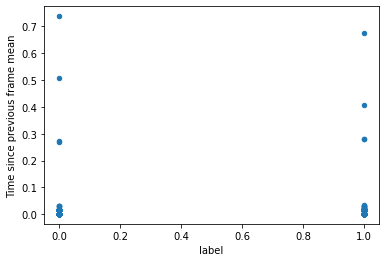

In [76]:
df_complete.plot(x ='label', y='Time since previous frame mean', kind = 'scatter')
plt.show()

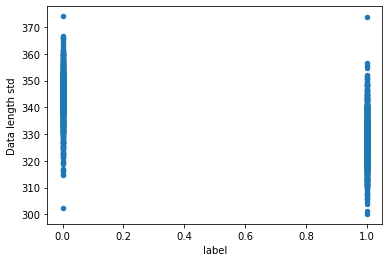

In [77]:
df_complete.plot(x ='label', y='Data length std', kind = 'scatter')
plt.show()

Classification

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
y_true = Y_test
y_true = pd.DataFrame(y_true)

label_names = ['Person' , 'Background']

In [79]:
model1 = KNeighborsClassifier()
model1.fit(X_train,Y_train)

KNeighborsClassifier()

In [80]:
y_pred_class1 = model1.predict(X_test)
y_pred_class1_prob = model1.predict_proba(X_test)[::,1]
y_pred_class1 = pd.DataFrame(y_pred_class1)

In [81]:
metrics.accuracy_score(y_true, y_pred_class1)

0.8958333333333334

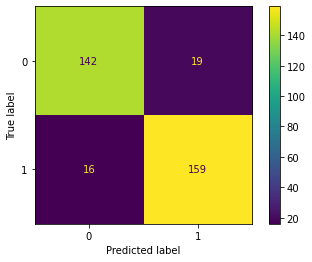

In [82]:
conf_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred_class1, labels=model1.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model1.classes_)

disp.plot()

plt.show()

In [83]:
print(classification_report(y_true=y_true, y_pred=y_pred_class1, target_names=label_names))

              precision    recall  f1-score   support

      Person       0.90      0.88      0.89       161
  Background       0.89      0.91      0.90       175

    accuracy                           0.90       336
   macro avg       0.90      0.90      0.90       336
weighted avg       0.90      0.90      0.90       336



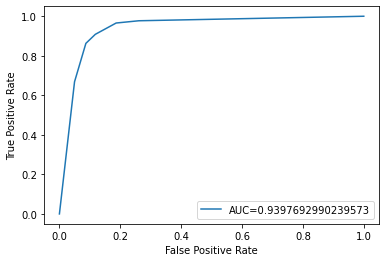

In [84]:
fpr, tpr, _ = metrics.roc_curve(y_true,  y_pred_class1_prob)
auc = metrics.roc_auc_score(y_true, y_pred_class1_prob)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [85]:
model2 = RandomForestClassifier()
y_pred_class2 = model2.fit(X_train, Y_train)

In [86]:
y_pred_class2 = model2.predict(X_test)
y_pred_class2_prob = model2.predict_proba(X_test)[::,1]
y_pred_class2 = pd.DataFrame(y_pred_class2)

In [87]:
metrics.accuracy_score(y_true, y_pred_class2)

0.9107142857142857

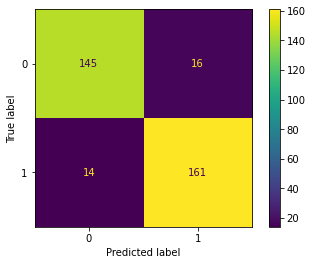

In [88]:
conf_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred_class2, labels=model2.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model2.classes_)

disp.plot()

plt.show()

In [89]:
print(classification_report(y_true=y_true, y_pred=y_pred_class2, target_names=label_names))

              precision    recall  f1-score   support

      Person       0.91      0.90      0.91       161
  Background       0.91      0.92      0.91       175

    accuracy                           0.91       336
   macro avg       0.91      0.91      0.91       336
weighted avg       0.91      0.91      0.91       336



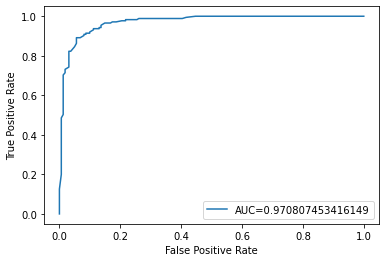

In [90]:
fpr, tpr, _ = metrics.roc_curve(y_true,  y_pred_class2_prob)
auc = metrics.roc_auc_score(y_true, y_pred_class2_prob)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [91]:
y_true.to_csv("expected_labels.csv", index=False)
y_pred_class1.to_csv("pred_labels_class1.csv", index=False)
y_pred_class2.to_csv("pred_labels_class2.csv", index=False)